## Experiment 8 Merger projection testing

In this experiment we will demonstrate the usage of `ImageMerger` class. We will describe two types of output formats and see cons and pros of them. Here we demonstrate the API on one image, it could be applied for a set of images passed as array of objects.

In [1]:
import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
nb_dir += '/directdemod'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from directdemod.merger import ImageMerger
from cartopy import config

We will set few configuration parameters, including path to image file, name of the satellite and path to tle file. You can edit `image_descriptor` variable below to set your own file.

In [3]:
# Note: in image descriptor in the field 'image_name' full path should be provided
image_descriptor = "../samples/image_desc.json"
tle_file = "../tle/noaa18_June_14_2018.txt"

## Image of the whole map

Our image merger imlementation should provide options to save the whole world projection with all the images on it. This could be done by passing `whole = True` as parameter to `merge_from_files` method. This method receives an array of tuples, where the first item is the path to image file with certain file name, the second one is the name of the satellite which made the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


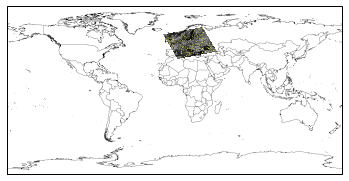

In [4]:
import json
image_desc = json.load(open(image_descriptor))

merger = ImageMerger(tle_file)
img = merger.merge([image_desc], whole=True)

In [5]:
img.show()

## Bounded image

When passing `whole = False` to `merge_from_files` merger will create a bounded image which will contain all of the projected images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


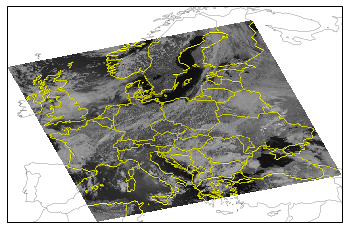

In [6]:
merger = ImageMerger(tle_file)
img = merger.merge_files([image_descriptor], whole=False)

In [7]:
img.show()

## Overlapping images

For overlapping images merger just overlays them. This wouldn't work if images were different, but we assume that images were taken in small time interval (10 minutes for example), therefore their overlapping parts won't different too much. The less the time interval, the lesser the difference would be. 
An example merge of totally different images (doesn't exist in reality) is presented below.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


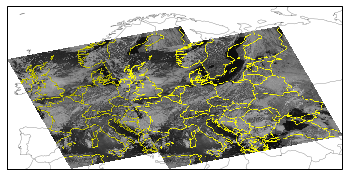

In [8]:
image_desc1 = json.load(open(image_descriptor))
image_desc2 = json.load(open(image_descriptor))
image_desc2['center'][1] = 40

merger = ImageMerger(tle_file)
img = merger.merge([image_desc1, image_desc2])

In [9]:
img.show()